#### [Kaggle Spaceship Titanic Competition](https://www.kaggle.com/competitions/spaceship-titanic/)
Score: 0.75309

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

**Data Exploration and Preprocessing: Traning data**

In [3]:
train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [5]:
train.isnull().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [6]:
train.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [7]:
train.describe(include=[object])

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,VIP,Name
count,8693,8492,8476,8494,8511,8490,8493
unique,8693,3,2,6560,3,2,8473
top,7353_02,Earth,False,G/734/S,TRAPPIST-1e,False,Keitha Josey
freq,1,4602,5439,8,5915,8291,2


In [8]:
tr_num = ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']
tr_cat = ['HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'VIP', 'Name', 'Transported']

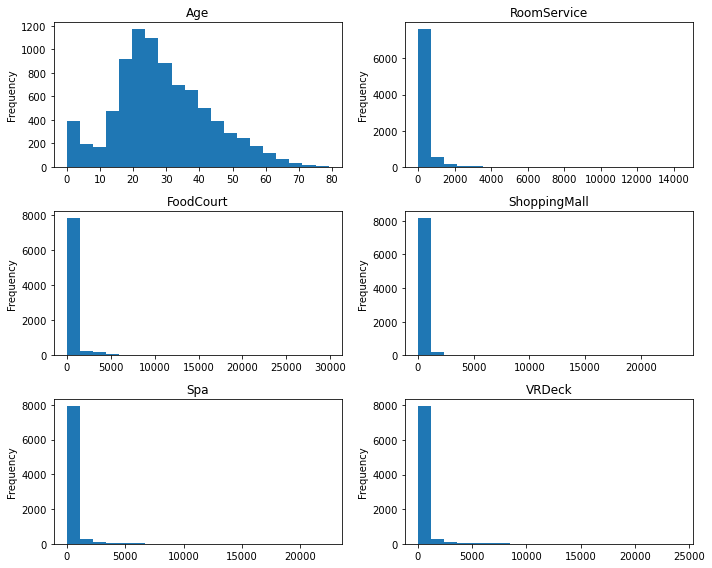

In [9]:
plt.figure(figsize=(10,8))
for i,num_col in enumerate(tr_num):
    plt.subplot(3,2,i+1)
    train[num_col].plot(kind='hist', bins=20)
    plt.title(num_col)
plt.tight_layout();

In [10]:
# create Deck and Side features from Cabin column
train[['Deck', 'Num', 'Side']] = train['Cabin'].str.split('/', expand=True)
train = train.drop(['Cabin', 'Num'], axis=1)
train.head()

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Deck,Side
0,0001_01,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,B,P
1,0002_01,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,F,S
2,0003_01,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,A,S
3,0003_02,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,A,S
4,0004_01,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,F,S


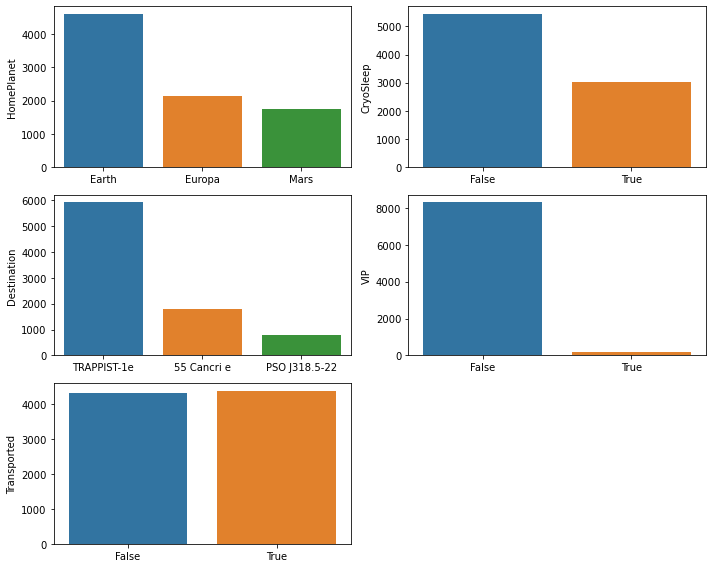

In [11]:
plt.figure(figsize=(10,8))
for i,cat_col in enumerate(['HomePlanet', 'CryoSleep', 'Destination', 'VIP', 'Transported']):
    plt.subplot(3,2,i+1)
    sns.barplot(data = train, x = train[cat_col].value_counts().index, y = train[cat_col].value_counts())
plt.tight_layout();

In [12]:
# create MoneySpent feature from the billed extra services 
train['MoneySpent'] = train['RoomService'] + train['FoodCourt'] + train['ShoppingMall'] + train['Spa'] + train['VRDeck'] 
train = train.drop(['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck'], axis=1)
train.head()

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,Name,Transported,Deck,Side,MoneySpent
0,0001_01,Europa,False,TRAPPIST-1e,39.0,False,Maham Ofracculy,False,B,P,0.0
1,0002_01,Earth,False,TRAPPIST-1e,24.0,False,Juanna Vines,True,F,S,736.0
2,0003_01,Europa,False,TRAPPIST-1e,58.0,True,Altark Susent,False,A,S,10383.0
3,0003_02,Europa,False,TRAPPIST-1e,33.0,False,Solam Susent,False,A,S,5176.0
4,0004_01,Earth,False,TRAPPIST-1e,16.0,False,Willy Santantines,True,F,S,1091.0


In [13]:
train.describe(include=[object])

,PassengerId,HomePlanet,CryoSleep,Destination,VIP,Name,Deck,Side
count,8693,8492,8476,8511,8490,8493,8494,8494
unique,8693,3,2,3,2,8473,8,2
top,7353_02,Earth,False,TRAPPIST-1e,False,Keitha Josey,F,S
freq,1,4602,5439,5915,8291,2,2794,4288


In [14]:
train = train.drop(['PassengerId', 'Name'], axis=1) # drop irrelevant data

for col in ['CryoSleep', 'VIP', 'Transported']:
    train[col] = train[col].replace(to_replace = [False, True], value = ['N', 'Y'])
for col in ['HomePlanet', 'CryoSleep', 'Destination', 'VIP', 'Transported', 'Deck', 'Side']:
    train[col] = train[col].fillna(train[col].mode()[0]) # fill with the most frequent values
for col in ['Age', 'MoneySpent']:
    train[col] = train[col].fillna(train[col].median()) # fill with the median values 
    
train.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,Transported,Deck,Side,MoneySpent
0,Europa,N,TRAPPIST-1e,39.0,N,N,B,P,0.0
1,Earth,N,TRAPPIST-1e,24.0,N,Y,F,S,736.0
2,Europa,N,TRAPPIST-1e,58.0,Y,N,A,S,10383.0
3,Europa,N,TRAPPIST-1e,33.0,N,N,A,S,5176.0
4,Earth,N,TRAPPIST-1e,16.0,N,Y,F,S,1091.0


In [15]:
train.isnull().sum() # no null values left

HomePlanet     0
CryoSleep      0
Destination    0
Age            0
VIP            0
Transported    0
Deck           0
Side           0
MoneySpent     0
dtype: int64

In [16]:
# encode target data
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
train['Transported'] = le.fit_transform(train['Transported'])
y = train['Transported']
y.head()

0    0
1    1
2    0
3    0
4    1
Name: Transported, dtype: int32

In [17]:
# encode training data
X = train.drop('Transported', axis=1)
X = pd.get_dummies(X)
X.head()

,Age,MoneySpent,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,CryoSleep_N,CryoSleep_Y,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,...,Deck_A,Deck_B,Deck_C,Deck_D,Deck_E,Deck_F,Deck_G,Deck_T,Side_P,Side_S
0,39.0,0.0,0,1,0,1,0,0,0,1,...,0,1,0,0,0,0,0,0,1,0
1,24.0,736.0,1,0,0,1,0,0,0,1,...,0,0,0,0,0,1,0,0,0,1
2,58.0,10383.0,0,1,0,1,0,0,0,1,...,1,0,0,0,0,0,0,0,0,1
3,33.0,5176.0,0,1,0,1,0,0,0,1,...,1,0,0,0,0,0,0,0,0,1
4,16.0,1091.0,1,0,0,1,0,0,0,1,...,0,0,0,0,0,1,0,0,0,1


**Model training**

In [18]:
# split data or cross validation
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [19]:
# XGBoost
from sklearn.model_selection import cross_val_score
from xgboost import XGBClassifier
xgb = XGBClassifier(random_state=42)
cross_val_score(xgb, X_train, y_train, scoring='accuracy', cv=5).mean()

0.7411592508882902

In [20]:
# hyperparameter optimization
from sklearn.model_selection import GridSearchCV 
params = {'n_estimators': [5, 10, 20, 30, 50], 
          'max_depth': [2, 3, 5, 7, 9], 
          'learning_rate': [0.1, 0.2, 0.3, 0.4, 0.5]}
xgb = GridSearchCV(xgb, param_grid = params, cv = 5, verbose = True, n_jobs = -1)
best_xgb = xgb.fit(X_train, y_train)
print(best_xgb.best_score_)
print(best_xgb.best_params_)

Fitting 5 folds for each of 125 candidates, totalling 625 fits
0.7541003056648857
{'learning_rate': 0.4, 'max_depth': 5, 'n_estimators': 10}


**Preprocessing: Test data**

In [21]:
test.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


In [22]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   4277 non-null   object 
 1   HomePlanet    4190 non-null   object 
 2   CryoSleep     4184 non-null   object 
 3   Cabin         4177 non-null   object 
 4   Destination   4185 non-null   object 
 5   Age           4186 non-null   float64
 6   VIP           4184 non-null   object 
 7   RoomService   4195 non-null   float64
 8   FoodCourt     4171 non-null   float64
 9   ShoppingMall  4179 non-null   float64
 10  Spa           4176 non-null   float64
 11  VRDeck        4197 non-null   float64
 12  Name          4183 non-null   object 
dtypes: float64(6), object(7)
memory usage: 434.5+ KB


In [23]:
test.isnull().sum()

PassengerId       0
HomePlanet       87
CryoSleep        93
Cabin           100
Destination      92
Age              91
VIP              93
RoomService      82
FoodCourt       106
ShoppingMall     98
Spa             101
VRDeck           80
Name             94
dtype: int64

In [24]:
test[['Deck', 'Num', 'Side']] = test['Cabin'].str.split('/', expand=True)
test = test.drop(['Cabin', 'Num'], axis=1)
test.head()

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Deck,Side
0,0013_01,Earth,True,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning,G,S
1,0018_01,Earth,False,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers,F,S
2,0019_01,Europa,True,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus,C,S
3,0021_01,Europa,False,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter,C,S
4,0023_01,Earth,False,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez,F,S


In [25]:
test['MoneySpent'] = test['RoomService'] + test['FoodCourt'] + test['ShoppingMall'] + test['Spa'] + test['VRDeck'] 
test = test.drop(['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck'], axis=1)
test.head()

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,Name,Deck,Side,MoneySpent
0,0013_01,Earth,True,TRAPPIST-1e,27.0,False,Nelly Carsoning,G,S,0.0
1,0018_01,Earth,False,TRAPPIST-1e,19.0,False,Lerome Peckers,F,S,2832.0
2,0019_01,Europa,True,55 Cancri e,31.0,False,Sabih Unhearfus,C,S,0.0
3,0021_01,Europa,False,TRAPPIST-1e,38.0,False,Meratz Caltilter,C,S,7418.0
4,0023_01,Earth,False,TRAPPIST-1e,20.0,False,Brence Harperez,F,S,645.0


In [26]:
pas_id = pd.DataFrame()
pas_id['PassengerId'] = test['PassengerId']
test = test.drop(['PassengerId', 'Name'], axis=1)

for col in ['CryoSleep', 'VIP']:
    test[col] = test[col].replace(to_replace = [False, True], value = ['N', 'Y'])
for col in ['HomePlanet', 'CryoSleep', 'Destination', 'VIP', 'Deck', 'Side']:
    test[col] = test[col].fillna(test[col].mode()[0])
for col in ['Age', 'MoneySpent']:
    test[col] = test[col].fillna(test[col].median())
    
test.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,Deck,Side,MoneySpent
0,Earth,Y,TRAPPIST-1e,27.0,N,G,S,0.0
1,Earth,N,TRAPPIST-1e,19.0,N,F,S,2832.0
2,Europa,Y,55 Cancri e,31.0,N,C,S,0.0
3,Europa,N,TRAPPIST-1e,38.0,N,C,S,7418.0
4,Earth,N,TRAPPIST-1e,20.0,N,F,S,645.0


In [27]:
Xt = pd.get_dummies(test)
Xt.head()

,Age,MoneySpent,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,CryoSleep_N,CryoSleep_Y,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,...,Deck_A,Deck_B,Deck_C,Deck_D,Deck_E,Deck_F,Deck_G,Deck_T,Side_P,Side_S
0,27.0,0.0,1,0,0,0,1,0,0,1,...,0,0,0,0,0,0,1,0,0,1
1,19.0,2832.0,1,0,0,1,0,0,0,1,...,0,0,0,0,0,1,0,0,0,1
2,31.0,0.0,0,1,0,0,1,1,0,0,...,0,0,1,0,0,0,0,0,0,1
3,38.0,7418.0,0,1,0,1,0,0,0,1,...,0,0,1,0,0,0,0,0,0,1
4,20.0,645.0,1,0,0,1,0,0,0,1,...,0,0,0,0,0,1,0,0,0,1


**Prediction**

In [28]:
y_pred = best_xgb.predict(Xt)

xgb_sub = {'PassengerId': pas_id.PassengerId, 'Transported': y_pred.astype(bool)}
sub_xgb = pd.DataFrame(data=xgb_sub)
sub_xgb.to_csv('xgb_sub.csv', index=False)

In [29]:
sub_xgb.head()

,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,False
4,0023_01,False
